# Data Science for Marketing | Practical Exam
## Introduction

In the practical exam, you will have ~7 days to work on a set of questions related to the analysis of different datasets. <br>
This activity does not intend to test your ability as a programmer.<br>
Instead, it aims to test your ability to study different problems using data-driven approaches using Statistical, Unsupervised, and Supervised Learning methods to support your decisions/conclusions.

**Notes** <br>
* All data your reported analysis needs to be reproducible in this notebook; <br>
* The task is individual but students are invited to discuss and brainstorm in group, which is a very effective learning strategy; <br>
* You should document all steps and code, failing to do so can lead to a penalty; <br>
* If you sourced code from third-party sources you should cite them; <br>
* This is an individual activity and weights 50% (10 points) of your final mark;<br>
* Feel free to answer questions in Portuguese; <br>
* Consider taking the most of the available Python libraries that you were introduced to during the semester, and feel free to explore aditional ones.

**Submission Details** <br>
The deadline for the submission is December 15th at 23:59. Submission through the corresponding activity in the Curricular Unit Moodle page. Your submission should consist of an archive __(zip file only)__ containing the following documents: <br>
1) A copy of this notebook with your answers in .ipynb format; <br>
2) A HTML version of the notebook with your answers (File -> Download As -> HTML); <br>
3) The Authorship Statement signed; <br> 

Documents 1) and 2) should be named with your student number, _e.g. M2020123.ipynb and M2020123.html_ <br>
__Submissions in .rar archives will not be graded.__ <br>
Submissions missing the original jupyter notebook format will not be graded.<br>
You do not need to include the datasets with the notebook <br>
Failing to comply with these guidelines will incur in a penalty. <br>
Late Submissions will incur a penalty of 1 point per day late.

### Good Luck, and enjoy!

## Details

Fill this cell with your following details:

Name: <b>Nickolas Lago</b><br>
StudentID: <b>M-qualquer-coisa</b><br>
E-Mail: <b>nickolas.lago@gmail.com</b><br>

## Boilerplate

Before we start, let us make sure that we have all the necessary packages installed in our working environment. We will also organize our file structure by creating a DATA folder to store all datasets. <br>
To that end, run the following cells to install and load all the necessary libraries. <br>
You can check in the third cell the output with  the versions of the main libraries that have been used in the preparation of this exam.

In [209]:
import sys
#!{sys.executable} -m pip install --upgrade pip --user
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install statsmodels
#!{sys.executable} -m pip install requests
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install scikit-learn

In [210]:
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile

In [211]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('Scikit-Learn version ',sc.__version__)

Pandas version  1.0.1
Numpy version  1.18.1
Scipy version  1.4.1
Seaborn version  0.10.0
Scikit-Learn version  0.22.1


## Part I - Exploratory Data Analysis (25% | 5 points)

In the first part of the practical exam, we will explore a dataset on a Marketing Campaign for Banking.
The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

_Source - [Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

The aim of Part I is to apply statistical methods in order to develop a deeper understanding of the dataset and problem. A good first step to have a more educated guess on what steps should follow.

In order to download the data to your computer, start by running the cell below. <br>
The data is in a .csv file with the name "bank_dataset", there is also an auxiliary .txt file with the name "bank_dataset_description" that provides a short description of all features in the dataset.<br>

Notes: <br>
- Consider also the method .pivot_table() as an alternative to .grouby() or .agg(). You can find more details at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html.
- Consider using data visualization (using pandas plot or Seaborn) to report your results.

Answer each question in Markup Cell and use visualizations whenever you can to support your findings.

In [212]:
#r = requests.get('https://www.dropbox.com/s/sifhl86lalrxs2v/partiv2.zip?dl=1', allow_redirects=True)
#open('parti.zip', 'wb').write(r.content);
#with ZipFile('parti.zip', 'r') as zipObj:
#   zipObj.extractall('DATA')
#shutil.rmtree('DATA/__MACOSX')

Load the dataset to a Pandas Dataframe.

In [213]:
df = pd.read_csv('DATA/parti/bank_dataset.csv', sep=';')

df.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**[Q1]** Describe the variables present in the dataset. Are there missing values? Should you process or clean any of the variables, how and why? Perform the necessary steps.

In [214]:
#Answer: First, we will get the DataFrame information, by calling the .info() function on it. This will get each column name, number of observations and its Dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [215]:
#Answer: Later, using .describe(), we can understand all variables summary. We use 'include="all"', in order to bring both numerical and object columns in the description.
#Remarks: You could also use .isna().sum() to see the fields with NaN, but as we see that all clumns have 41.188 registers we will skip this part.

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188,NaN,NaN,NaN,40.0241,10.4212,17,32,38,47,98
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**[Q2]** How many observations are in the dataset?

In [216]:
#Answer: Printing the results of Rows and Columns below.

rows = df.shape[0]
columns = df.shape[1]

print('There are ' + str(rows) + ' observation in the data set. The rows are in ' + str(columns) + ' different columns.')

There are 41188 observation in the data set. The rows are in 21 different columns.


**[Q3]** What is the distribution of ages and education of clients?

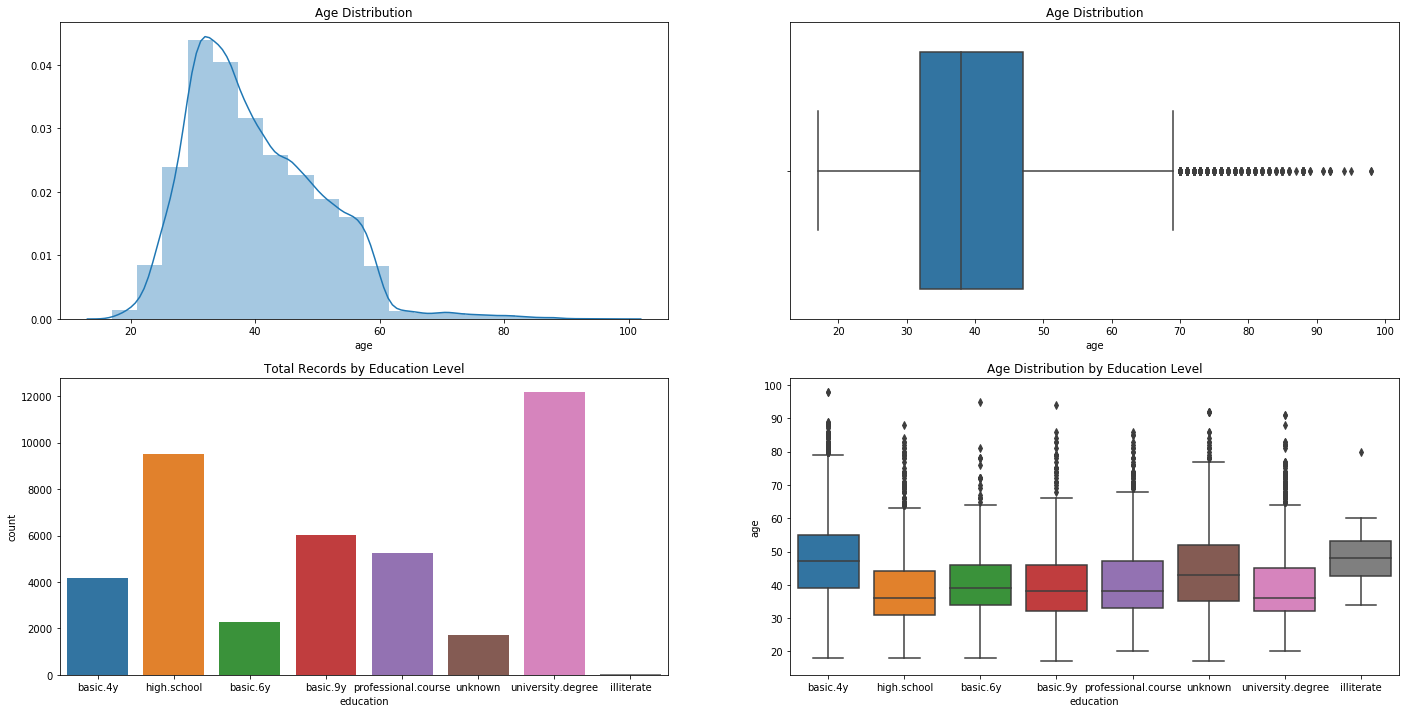

In [217]:
#Answer: To see the distribution of ages and educational levels, we will plot some charts. First is a .distplot() to check the age distribution, after that a boxplot to visualy see the info of age we got on the .describe() function above. Second, we will look to education, with a .countplot() we'll count the number of records for each educational level, and last will plot each educational level age in a .boxplot().

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (24, 12))
sns.distplot(df['age'], bins=20, ax=axes[0][0])
sns.boxplot(data=df, x='age', ax=axes[0][1])
sns.countplot(data=df, x='education', ax=axes[1][0])
sns.boxplot(data=df, x='education', y='age', ax=axes[1][1])

axes[0][0].set(Title='Age Distribution')
axes[0][1].set(Title='Age Distribution')
axes[1][0].set(Title='Total Records by Education Level')
axes[1][1].set(Title='Age Distribution by Education Level')
plt.show()

From the plot Analysis above, we can have a clear view of how is the age is distribuited within our dataset. 

**[Q4]** What is the age of the youngest and oldest client that has the value cellular in the feature contact?

In [218]:
#Answer: We will simply print the .min() and .max() function for users with cellular as preferable contact form.
#Remarks: We could build the pivot table below to validate the results.
#contactform = pd.pivot_table(df, values=['age'], index=['contact'], aggfunc={'age': [min, max, np.mean]})

df_ageMin = df[(df['contact']) == 'cellular']['age'].min()
df_ageMax = df[(df['contact']) == 'cellular']['age'].max()

print('From the clients with cellular as its preferable contact form, the youngest has ' + str(df_ageMin) + ', and the oldest has ' + str(df_ageMax) + ' years old.')

From the clients with cellular as its preferable contact form, the youngest has 17, and the oldest has 98 years old.


**[Q5]** What is the average, minimum, and maximum age of clients by marital status?

In [219]:
#Answer: To get the min, max and average of each marital group, we will quickly create a pivot table to aggregate this values. Later, we can plot the age boxes by the marital status to better visualize the resuts.
marital_age = pd.pivot_table(df, values=['age'], index=['marital'],
                    aggfunc={'age': [min, max, np.mean]})
marital_age

age                 
           max       mean   min
marital                        
divorced  95.0  44.899393  24.0
married   98.0  42.307165  20.0
single    86.0  33.158714  17.0
unknown   66.0  40.275000  25.0

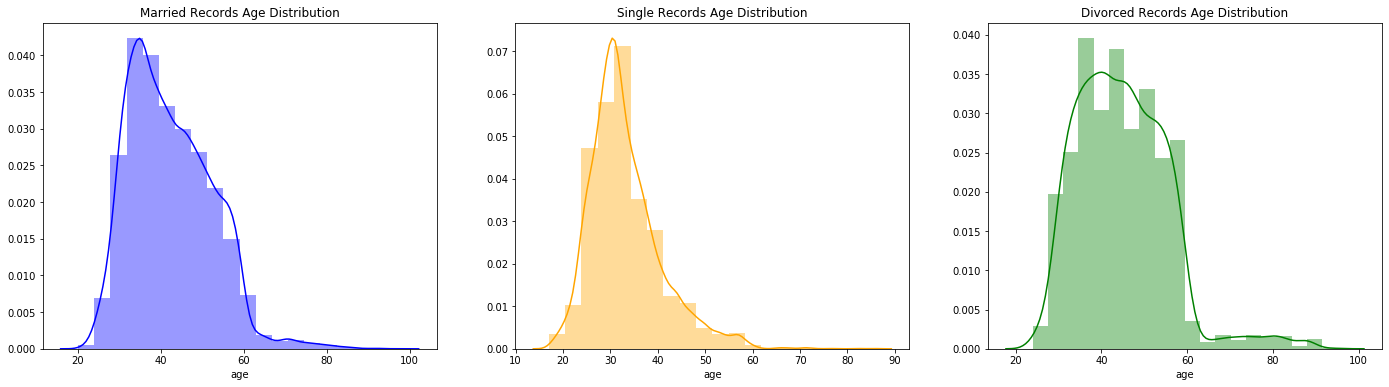

In [220]:
#With the values discovered above, let's plot the different marital status to understand its distribution.
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24, 6))
sns.distplot(df[(df['marital']) == 'married']['age'], bins=20, ax=ax[0], color='blue')
sns.distplot(df[(df['marital']) == 'single']['age'], bins=20, ax=ax[1], color='orange')
sns.distplot(df[(df['marital']) == 'divorced']['age'], bins=20, ax=ax[2], color='green')

ax[0].set(Title='Married Records Age Distribution')
ax[1].set(Title='Single Records Age Distribution')
ax[2].set(Title='Divorced Records Age Distribution')
plt.show()

**[Q6]** Estimate the correlations between the existing numerical variables. What can you conclude? For instance, which variable(s) show a high/low correlations with the target (subscription of the product)?

In [221]:
#Answer: in order to plot a correlation from the numerical values and the goal, we will have to transfor the goal column also in a numeric variable. To do that, we will create a column named 'success' with values 0/1 based on the insights from the df['y'] column.

yn = {
    'no': 0,
    'yes': 1
}
df['success'] = df['y'].replace(yn)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


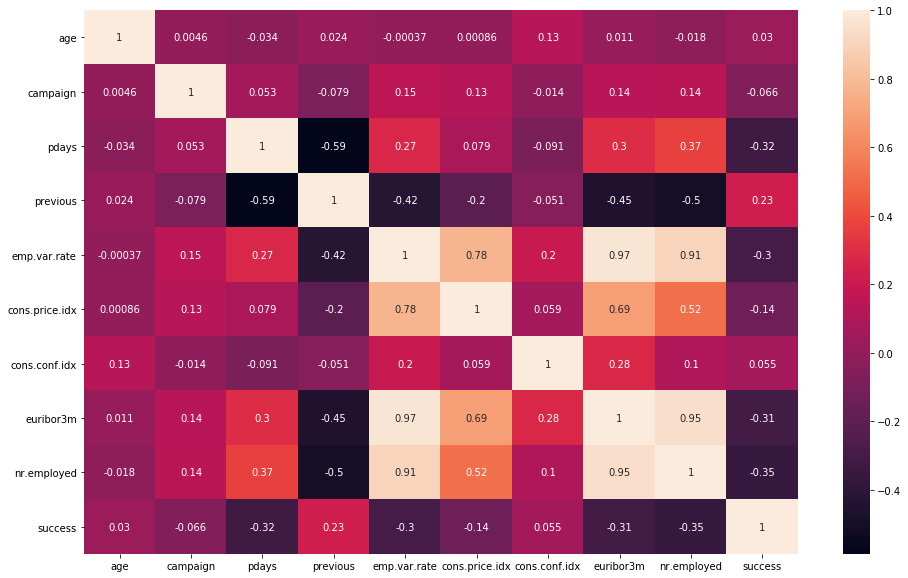

In [222]:
#Answer: Now that we have our 'success' numeric variable, we could simply plot a heatmap with the numeric variables correlation with each other.

num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'success']

df_num = df[num_cols]

plt.figure(figsize=(16,10))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

**[Q7]** What is the percentage of success of the campaign? Estimate the success by comparing the number of subscribers with the total number of clients reached during the phone campaign.

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [224]:
#Answer: jeito porco de fazer isso;

answered = df[(df['duration']) > 0]
successed = df[(df['success']) == 1]

print(successed.shape[0] / answered.shape[0])

0.11266511266511267


**[Q8]** What is the typical contact type by marital state and job?

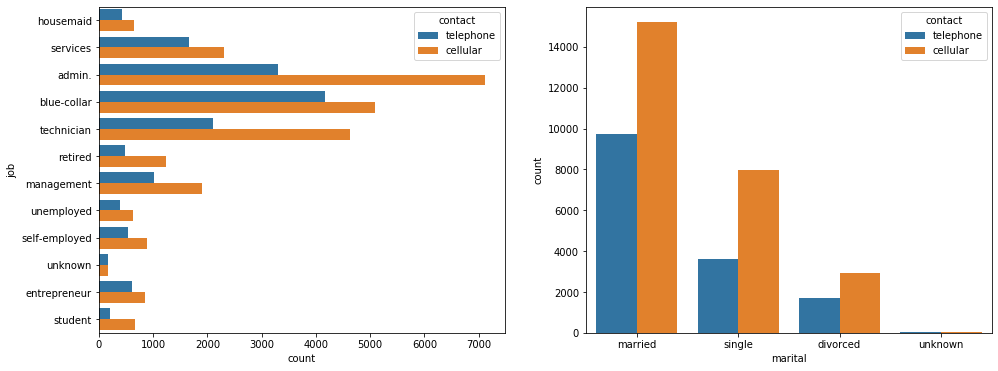

In [225]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.countplot(data=df, y='job', hue='contact', ax=ax[0])
sns.countplot(data=df, x='marital', hue='contact', ax=ax[1])

plt.show()

**[Q9]** What is the relative number of clients per job?

In [226]:
pd.pivot_table(df, values=['age'], index=['job'], aggfunc='count')

,age
job,
admin.,10422
blue-collar,9254
entrepreneur,1456
housemaid,1060
management,2924
retired,1720
self-employed,1421
services,3969
student,875


**[Q10]** What is the average age of clients by marital state and contact type?

In [227]:
pd.pivot_table(df, values=['age'], index=['marital', 'contact'],
                    aggfunc={'age': [np.mean, 'count']})

age           
                      count       mean
marital  contact                      
divorced cellular    2908.0  45.211829
         telephone   1704.0  44.366197
married  cellular   15206.0  42.789425
         telephone   9722.0  41.552870
single   cellular    7977.0  32.686975
         telephone   3591.0  34.206628
unknown  cellular      53.0  38.905660
         telephone     27.0  42.962963

**[Q11]** If you were asked to study this dataset and develop a model to aid in the next phone campaign of the same Bank, which approach would you follow? <br>
__Provide a discussion, the question does not require any further programming or analytics.__

< Answer here >

Part I is done, let's move on!

## Part II - Supervised and Unsupervised Learning (35% | 7 points)

In the second part of the Practical Exam, you have to choose between one of two challenges. <br> 
The first involves the use of a regression model to obtain insights on which features help explain houses Sales prices. The second challenge asks you to perform the clustering of an agnostic dataset and compare the results from K-Means with Hierarchical clustering algorithms.

__You are not required to solve both challenges.__ <br>
Instead, you have to choose one. However, your choice incurs in a cost. <br>
- If you choose to do the first challenge (II.1) it will require a bit more work, including data exploration due to a large number of features, but it will grant you the opportunity to obtain the full 7 points from Part II;<br>
- If you choose to do the second challenge, it will be slightly more straightforward as it is not necessary data exploration, but you will only be able to achieve a maximum of 5 points from Part II. <br>

Delete the cells from the challenge (II.1 ) or (II.2) that you do not want to count for grading. <br>
If you leave both we will only grade II.2 <br>

### II.1 - Supervised Learning (7 points)

In this task we ask you to use a **multi-linear regression model** to invesgate which variables are better predictors of the Sale Price of a house. <br> The dataset includes 81 features from 2919 sales. <br>

Let's start by downloading the data files to your computer. You can do that by running the cell below.

In [228]:
#r = requests.get('https://www.dropbox.com/s/1fcws6aaodry54n/partii.zip?dl=1', allow_redirects=True)
#open('partii.zip', 'wb').write(r.content);
#with ZipFile('partii.zip', 'r') as zipObj:
#   zipObj.extractall('DATA')
#shutil.rmtree('DATA/__MACOSX')

You have downloaded two files to your computer. <br>
The data is in a .csv file with the name "house_dataset", but there is also an auxiliary .txt file with the name "house_dataset_description" that provides a short description of all features in the dataset. <br>
The target for the regression is the variable SalePrice. <br>

Load the file to a pandas dataframe.<br>

In [502]:
#Import the dataset as house_df
house_df = pd.read_csv('DATA/house_dataset.csv')

#Set the index column to the dataset provided index
house_df.set_index('index', inplace=True)

#Drop the other columns that were also used as index values
cols_to_drop = ['Id', 'Unnamed: 0']
house_df.drop(columns=cols_to_drop, inplace=True)

#Replacing rating elements to numerical values
rating_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rating_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageCond', 'PoolQC']

house_df[rating_cols] = house_df[rating_cols].replace(rating_dict)

In [503]:
cols_to_keep = []

Perform the necessary Data Exploration to get an intuition about your data. 

**[Q1]** Identify and select a small group, of at most 8 features, that you believe can be relevant in explaining the SalePRice. Support your choice with data analysis, but beware that the choice might include some degree of **subjectivity**, which can be done visually or through analytics but also by reasoning if you have knowladge of the topic. <br>

A good starting point is to try to answer the following questions:<br>
- Are there missing values? How should you handle those situations? <br>
- How many variables do you have of each type (numeric and categoric)?<br>
- Are there relevant categoric variables that require a transformation/encoding before modeling? <br>
- Are there features that require normalization in order to make them comparable for modelling?<br>
- How do variables correlate with each other?<br>

__These are just guidelines, you don't need to explicitly answer them.__<br>

Do the data exploratory and pre-processing steps below. <br>
Then, write a summary of what you have learned with it, and how it helped support your feature selection and data cleaning (e.g., transformations, normalization, filtering, etc). 

**Notes**<br>
- Report just the necessary python code to reproduce your relevant analysis, and be selective in what you show. Showing more can be worse than just selecting the necessary insights or analysis to support your answers and decisions. <br>
- Be objective in your reporting, don't write a master thesis; <br>
- Use data visualization as a way to communicate your findings (one image is worth one thousand words) <br>
- Document carefully all your code, and the rationale behind each step. <br>

<h3>1. Handling Missing Values</h3>

Right at first, we see that there are many missing values for the target column "SalePrice". There for, we will sepparate this rows in a different DataFrame and later after validating the model, we could use it in order to fill such NaN.

In [504]:

house_df_clean = house_df.dropna(subset=['SalePrice'])
house_df_clean.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [505]:
#Creating a DataFrame with only the numerical variables in the DataFrame to later analyse its correlation with SalePrice
house_df_numerical = house_df_clean.select_dtypes(include=['float64', 'int64'])

#Describe the correlation from each column to SalePrice
house_df_numerical.corrwith(house_df_numerical['SalePrice']).sort_values(ascending=False).head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
BsmtQual        0.644019
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
dtype: float64

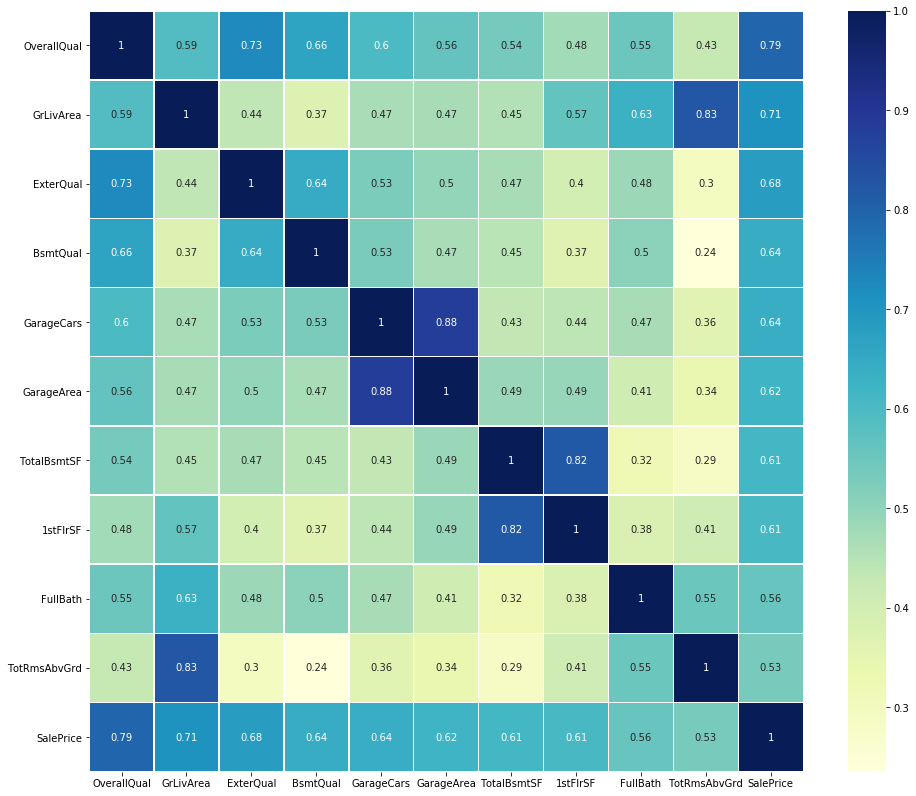

In [506]:
#From the Results above, we picked the 10 most correlated numerical variables to the SalePrice. Now let's look how does these variables relate to each other and if we could cut some based on that.
cols_house_num = ['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'SalePrice']

plt.figure(figsize=(16,14))
sns.heatmap(house_df_numerical[cols_house_num].corr(), annot= True , linewidths=.5, cmap='YlGnBu')
plt.show()

In [507]:
#We can see that there are 3 correlations that are impacting the Data.
# - GrLivArea x TotRmsAbvGrd
# - TotalBsmtSF x 1srFlrSF
# - GarageCars x GarageArea
cols_prediction = ['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']

#From the 7 columns selected, we will know see how many missing values we have in the origina DataFrame. Dealing with this values will allow us later to predict the cost of all houses.
house_df[cols_prediction].isna().sum()

OverallQual       0
GrLivArea         0
ExterQual         0
BsmtQual         81
GarageCars        1
TotalBsmtSF       1
FullBath          0
SalePrice      1459
dtype: int64

In [508]:
#According to the description of the DataFrame, those with NaN on BsmtQual meant that the house didn't have a basement and the same applies for GarageCars. With that, we will simply fill these NaN with 0;
house_df['BsmtQual'].fillna(0, inplace=True)
house_df['GarageCars'].fillna(0, inplace=True)
#We are also ffilling the MSZoning column here once it will be used later ;)
house_df['MSZoning'].fillna(axis=0, method='ffill', inplace=True)

house_df[cols_prediction].isna().sum()

OverallQual       0
GrLivArea         0
ExterQual         0
BsmtQual          0
GarageCars        0
TotalBsmtSF       1
FullBath          0
SalePrice      1459
dtype: int64

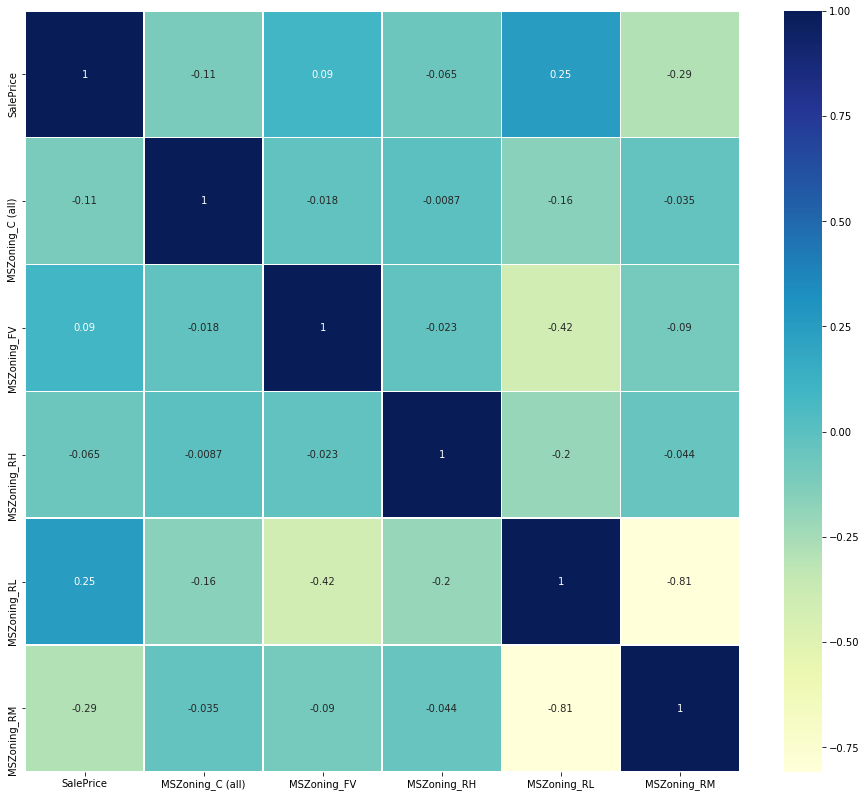

In [509]:
#To understand the importance of the Categorical variable to the SalePrice, created this heatmap plot where you select the "dummy_var" according to the categorical variable you want to check and it will create the dummy variables and the heatmap plot.

#Select the Categorical Variable
dummy_var = 'MSZoning'
dummies = house_df_clean[[dummy_var, 'SalePrice']]
dummies_corr = pd.get_dummies(dummies, columns=[dummy_var])

plt.figure(figsize=(16,14))
sns.heatmap(dummies_corr.corr(), annot= True , linewidths=.5, cmap='YlGnBu')
plt.show()

<h4>Exploration Findings</h4>

In this exploration phase, we took care of three main issues:

- <b>Missing Values I</b>: in the SalePrice column, there were many houses with missing values. After the Model is validated, we could use it to fill these values. It was created a clean DataFrame house_df_clean, where we hold all records with SalePrice column;
- <b>Missing Values II</b>: after creating the house_df_clean, most of our missing values were also gone. From the columns identified for the model there were some NaN on two columns: ['BsmtQual', 'GarageCars']. Reading the dataset description, we could understand that those missing values actually represent that the house did not have that feature (basement and garage, in this case). With this clarify, we simply replaced this NaN by 0;
- <b>Categorical x Numerical Variables I</b>: right in the begining, it were identified columns that had scales being represented by strings. Using the "rating_dict", all possible categorical variables were turned into numerical ones;
- <b>Categorical x Numerical Variables II</b>: to identify which categorical variable would be usefull in the modeling, it was created a heatmap where we could test its correlation as a Dummy variable to the SalePrice column;
- <b>Picking the Variables</b>: 

Use a multi-linear regression model to answer the following questions: <br>
**[Q2]** Which of the 8 selected features helps to explain the SalePrice? <br>
**[Q3]** How well does the model perform in explaining the Sale Price? <br>
**[Q4]** If you are planning to put your house on sale, which feature of your data you should renovate in order to maximize your Sale Price? (you can ignore the renovation cost in this analysis)

**Notes:**
Check the p-values associated with the coefficients of each variable/feature to identify which are the relevant features in your model. For this task, consider using the package _Statsmodel_.

In [510]:
#Let's .pairplot() all selected features to understand which of it has the best insights in predicting the house SalePrice
#sns.pairplot(house_df_clean[cols_prediction])

< Write a short summary of your findings >

In [522]:
house_df_pred = house_df_clean[cols_prediction]

In [523]:
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [513]:
m1 = smf.ols('SalePrice ~ GrLivArea', data = house_df_pred).fit()
m2 = smf.ols('SalePrice ~ OverallQual', data = house_df_pred).fit()
m3 = smf.ols('SalePrice ~ TotalBsmtSF', data = house_df_pred).fit()
m4 = smf.ols('SalePrice ~ GrLivArea + OverallQual', data = house_df_pred).fit()
m5 = smf.ols('SalePrice ~ GrLivArea + TotalBsmtSF', data = house_df_pred).fit()
m6 = smf.ols('SalePrice ~ OverallQual + TotalBsmtSF', data = house_df_pred).fit()
m7 = smf.ols('SalePrice ~ OverallQual + TotalBsmtSF + GrLivArea', data = house_df_pred).fit()

In [514]:
print(summary_col([m1, m2, m3, m4, m5, m6, m7], stars = True, 
            info_dict = {'N': lambda x: "{}".format(int(x.nobs)),
                         'R2': lambda x: "{:.3}".format(x.rsquared),
                         'ADJR2': lambda x: "{:.3}".format(x.rsquared_adj)}))


             SalePrice I   SalePrice II  SalePrice III  SalePrice IIII SalePrice IIIII SalePrice IIIIII SalePrice IIIIIII
-------------------------------------------------------------------------------------------------------------------------
GrLivArea   107.1304***                                55.8622***      81.8768***                       49.4526***       
            (2.7936)                                   (2.6298)        (2.7806)                         (2.5507)         
Intercept   18569.0259*** -96206.0795*** 63430.6285*** -104092.6696*** -13479.0052***  -97015.6330***   -103806.0206***  
            (4480.7545)   (5756.4074)    (4286.8918)   (5045.3716)     (4283.8061)     (5361.7694)      (4794.5650)      
OverallQual               45435.8026***                32849.0474***                   37256.4714***    28046.7153***    
                          (920.4302)                   (999.1976)                      (1016.8649)      (1023.7429)      
R-squared   0.5018     

In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [529]:
train, test = train_test_split(house_df_pred, test_size = 0.2, random_state = 0)

# split x and y
values = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']

# Train
x_train = house_df_pred[values]
y_train = house_df_pred[['SalePrice']]

# Test
x_test = house_df_pred[values]
y_test = house_df_pred[['SalePrice']]

print(train.shape[0])
print(test.shape[0])

1168
292


In [530]:
#TRAIN
#We will first train our model in the train dataset;
y_pred = model.predict(x_train)

train['Price_predict'] = y_pred

print('Train R2 = {}'.format(r2_score(train['SalePrice'], train['Price_predict'])))
print('Train MSE = {}'.format(mean_squared_error(train['SalePrice'], train['Price_predict'])))
print('Train MAE = {}'.format(mean_absolute_error(train['SalePrice'], train['Price_predict'])))

Train R2 = 0.5663724347688617
Train MSE = 2669827655.416096
Train MAE = 34323.893835616436


In [531]:
#TEST
#Now, based on the training model, we will plot the prediction on its price
y_pred = model.predict(x_test)

test['Price_predict'] = y_pred

print('Test R2 = {}'.format(r2_score(test['SalePrice'], test['Price_predict'])))
print('Test MSE = {}'.format(mean_squared_error(test['SalePrice'], test['Price_predict'])))
print('Test MAE = {}'.format(mean_absolute_error(test['SalePrice'], test['Price_predict'])))

Test R2 = 0.5751687248891999
Test MSE = 2933821045.931507
Test MAE = 32063.897260273974


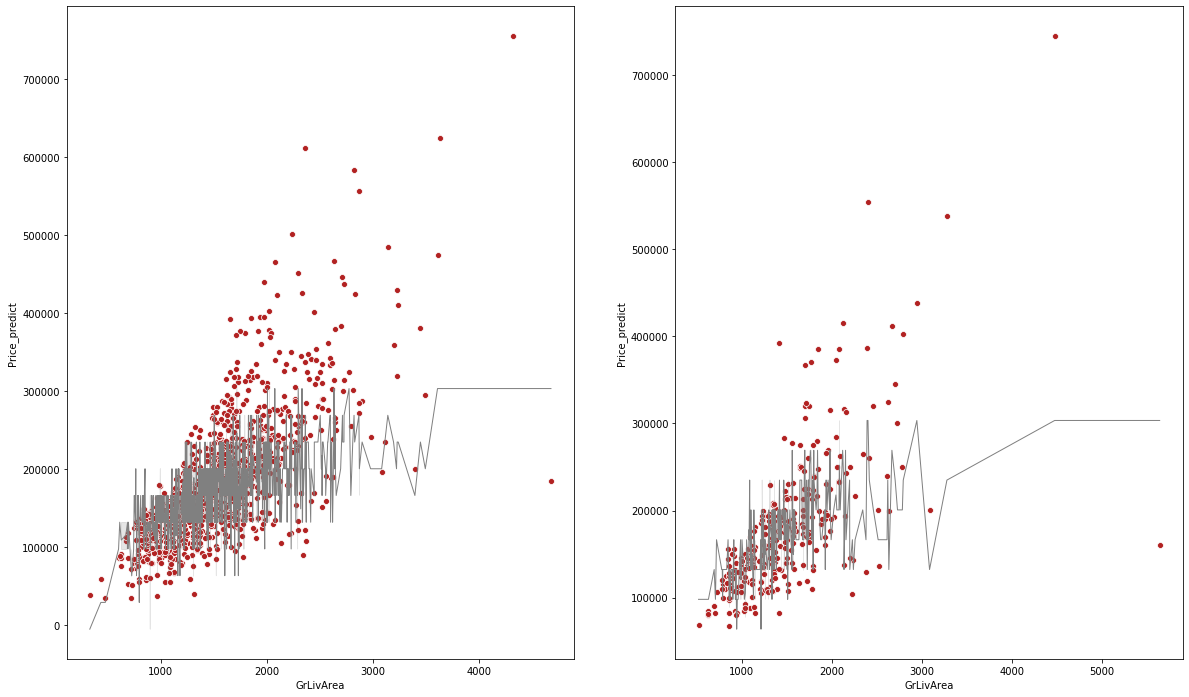

In [532]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
sns.scatterplot(data = train, x = 'GrLivArea', y = 'SalePrice', color = 'firebrick', ax=ax[0])
sns.lineplot(data = train, x = 'GrLivArea', y = 'Price_predict', color = 'gray', linewidth = 1, ax=ax[0])
sns.scatterplot(data = test, x = 'GrLivArea', y = 'SalePrice', color = 'firebrick', ax=ax[1])
sns.lineplot(data = test, x = 'GrLivArea', y = 'Price_predict', color = 'gray', linewidth = 1, ax=ax[1])

plt.show()

### II.2 - Unsupervised Learning (5 points)

In this challenge, each student is assigned a specific dataset. <br>
The data is in .csv format and you should use the dataset whose number matches the last number of your student ID. <br>

Start by running the following cell to download the data. <br>
The data files will be downloaded to ./DATA/ClusterData/ folder, which is located the same folder as this notebook. <br>
Then load the dataset into a Pandas dataframe. <br>
The data file consists of 5000 2-dimensional datapoints. <br>
These have been artificially generated and do not have any meaning, they are however a good starting point to test the implementation of a clustering algorithm.

In [486]:
#r = requests.get('https://www.dropbox.com/s/6scrqrkq9gwxlcp/ClusterData.zip?dl=1', allow_redirects=True)
#open('ClusterData.zip', 'wb').write(r.content);
#with ZipFile('ClusterData.zip', 'r') as zipObj:
#   zipObj.extractall('DATA')

Answer the following questions: <br>

**[Q1]** How many clusters do you identify in the dataset? 

Start by reporting on the number of dimensions in the data. <br>
Use K-means to identify the number of clusters. <br>
Explore the results visually and explain the steps you performed to arrive at your answer. <br>

< Answer here >

**[Q2]** Provide a comparison between the results obtained using K-means with hierarchical clustering. What conclusions do arrive at? Can you reason which clustering technique is more adequate for the current dataset?

Notes:<br>
- Use the "ward" linkage in the Hierarchical Clustering;
- Consider performing the comparison visually, but in the best scenario do it using performance metrics such as the silhouette score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

< Answer here >

## Part III - A Short Data Science Project (40% | 8 points)

The third part of this exam requires a combination of the topics we discussed during the semester, in order to extract valuable insights and value from a dataset.<br>
Consider a dataset that contains personal information and shopping behavior details of over 2 000 customers at the _DS4MKT GOODS™_ store. To achieve better profitability and a data-driven decision-making, Management is considering the application of advanced analytics techniques.

<b>Perform the necessary steps in order to answer the following questions:</b><br>

**[Q1]** Develop a supervised learning model to identify which customers are more likely to accept a future campaign. Hint: Use the result of the last campaign (#6 - Response) as the target variable. <br>
**[Q2]** How good is your model? Is it robust to unseen data? What are the most important characteristics to predict this response? What is the business viability of your model? <br>
**[Q3]** How would you segment the customers based on their product preferences, regardless of total ammount spent? Create a (short) marketing strategy for each one.<br>

__You are expected to support your answers with data, and analysis. It is also expected that you are able to go beyond the features already available in the dataset and create some new ones.__ However, you will not be granted extra points for unnecessary steps, or out of scope analysis. In that sense, be objective in what you do, to support your answer to the above questions.

Start by running the cell below in order to download the data files. <br>
The data files will be downloaded to ./DATA/ folder, which is located the same folder as this notebook. <br>
The files include an excel document "goods_data.xlsx" with the data, and a .txt file with a short description of the dataset.

In [487]:
#r = requests.get('https://www.dropbox.com/s/h7v25van21pjaj7/partiii.zip?dl=1', allow_redirects=True)
#open('partiii.zip', 'wb').write(r.content);
#with ZipFile('partiii.zip', 'r') as zipObj:
#   zipObj.extractall('DATA')
#shutil.rmtree('DATA/__MACOSX')